In [28]:
import numpy as np
import pandas as pd
import networkx as nx
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from statistics import variance, mean
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Paths
path = {
    "Qatar World Cup": {
        "csv": "datasets/youtube/qatar_world_cup.csv",
        "graphml": "graphs/youtube/qatar_world_cup_louvain.graphml"
    },
    "Russia World Cup": {
        "csv": "datasets/youtube/russia_world_cup.csv",
        "graphml": "graphs/youtube/russia_world_cup_louvain.graphml"
    },
    "Tokyo Olympics": {
        "csv": "datasets/youtube/tokyo_olympics.csv",
        "graphml": "graphs/youtube/tokyo_olympics_louvain.graphml"
    },
    "Paris Olympics": {
        "csv": "datasets/youtube/paris_olympics.csv",
        "graphml": "graphs/youtube/paris_olympics_louvain.graphml"
    }
}

path2 = {
    "Qatar World Cup": {
        "csv": "datasets/reddit/qatar_world_cup.csv",
        "graphml": "graphs/reddit/qatar_world_cup_louvain.graphml"
    },
    "Russia World Cup": {
        "csv": "datasets/reddit/russia_world_cup.csv",
        "graphml": "graphs/reddit/russia_world_cup_louvain.graphml"
    },
    "Tokyo Olympics": {
        "csv": "datasets/reddit/tokyo_olympics.csv",
        "graphml": "graphs/reddit/tokyo_olympics_louvain.graphml"
    },
    "Paris Olympics": {
        "csv": "datasets/reddit/paris_olympics.csv",
        "graphml": "graphs/reddit/paris_olympics_louvain.graphml"
    }
}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Harvey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Store results
results = []

# Analyse each event
for event, paths in path.items():
    df = pd.read_csv(paths["csv"])
    df.dropna(subset=['text'], inplace=True)

    # Apply VADER
    df['vader_score'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment'] = df['vader_score'].apply(classify_sentiment)

    sentiment_mean = mean(df['vader_score'])
    sentiment_variance = variance(df['vader_score'])

    # Graph analysis
    G = nx.read_graphml(paths["graphml"])
    if nx.is_directed(G):
        G = G.to_undirected()

    density = nx.density(G)
    clustering = nx.average_clustering(G)
    components = nx.number_connected_components(G)
    avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
    degree_centrality = mean(list(nx.degree_centrality(G).values()))

    results.append({
        "Event": event,
        "Sentiment Mean": sentiment_mean,
        "Sentiment Variance": sentiment_variance,
        "Graph Density": density,
        "Avg Clustering Coefficient": clustering,
        "Connected Components": components,
        "Avg Degree": avg_degree,
        "Avg Degree Centrality": degree_centrality
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

In [35]:
results_df

,Event,Sentiment Mean,Sentiment Variance,Graph Density,Avg Clustering Coefficient,Connected Components,Avg Degree,Avg Degree Centrality
0,Qatar World Cup,0.084368,0.087474,0.000122,0.027011,109,2.129416,0.000122
1,Russia World Cup,0.086569,0.116523,0.000121,0.020990,133,2.129838,0.000121
2,Tokyo Olympics,0.129698,0.126684,0.000103,0.024490,64,2.115430,0.000103
3,Paris Olympics,0.039826,0.194537,0.000137,0.022960,146,2.125924,0.000137


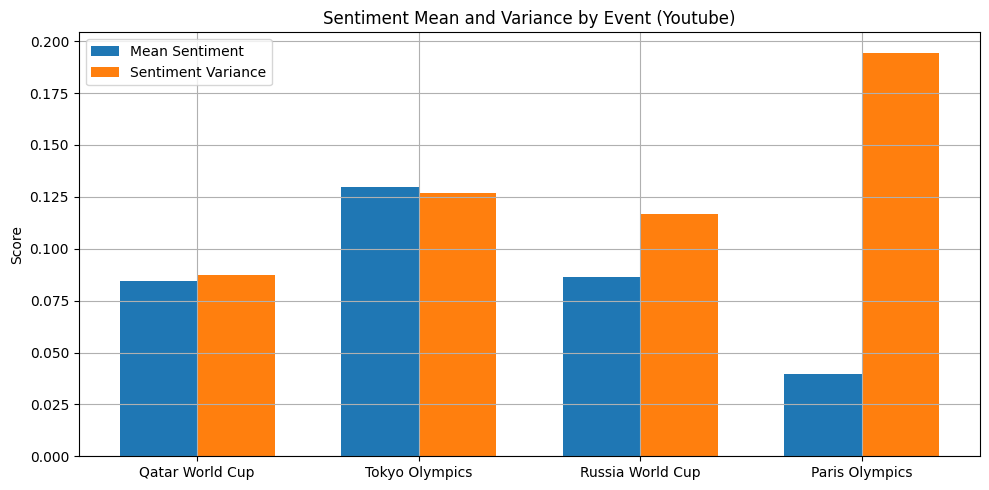

In [46]:
events = ["Qatar World Cup", "Tokyo Olympics", "Russia World Cup", "Paris Olympics"]
sentiment_mean = [0.084368, 0.129698, 0.086569, 0.039826]
sentiment_variance = [0.087474, 0.126684, 0.116523, 0.194537]

x = np.arange(len(events))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, sentiment_mean, width, label='Mean Sentiment')
bars2 = ax.bar(x + width/2, sentiment_variance, width, label='Sentiment Variance')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Sentiment Mean and Variance by Event (Youtube)')
ax.set_xticks(x)
ax.set_xticklabels(events)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Store results
results = []

# Analyse each event
for event, paths in path2.items():
    df = pd.read_csv(paths["csv"])
    df.dropna(subset=['text'], inplace=True)

    # Apply VADER
    df['vader_score'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment'] = df['vader_score'].apply(classify_sentiment)

    sentiment_mean = mean(df['vader_score'])
    sentiment_variance = variance(df['vader_score'])

    # Graph analysis
    G = nx.read_graphml(paths["graphml"])
    if nx.is_directed(G):
        G = G.to_undirected()

    density = nx.density(G)
    clustering = nx.average_clustering(G)
    components = nx.number_connected_components(G)
    avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
    degree_centrality = mean(list(nx.degree_centrality(G).values()))

    results.append({
        "Event": event,
        "Sentiment Mean": sentiment_mean,
        "Sentiment Variance": sentiment_variance,
        "Graph Density": density,
        "Avg Clustering Coefficient": clustering,
        "Connected Components": components,
        "Avg Degree": avg_degree,
        "Avg Degree Centrality": degree_centrality
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

,Event,Sentiment Mean,Sentiment Variance,Graph Density,Avg Clustering Coefficient,Connected Components,Avg Degree,Avg Degree Centrality
0,Qatar World Cup,0.071323,0.214659,0.000186,0.058068,9,2.662717,0.000186
1,Russia World Cup,0.094994,0.196359,0.000206,0.075161,12,2.737698,0.000206
2,Tokyo Olympics,0.126670,0.213091,0.000209,0.075320,10,2.644054,0.000209
3,Paris Olympics,0.104634,0.210734,0.000188,0.064504,8,2.617649,0.000188


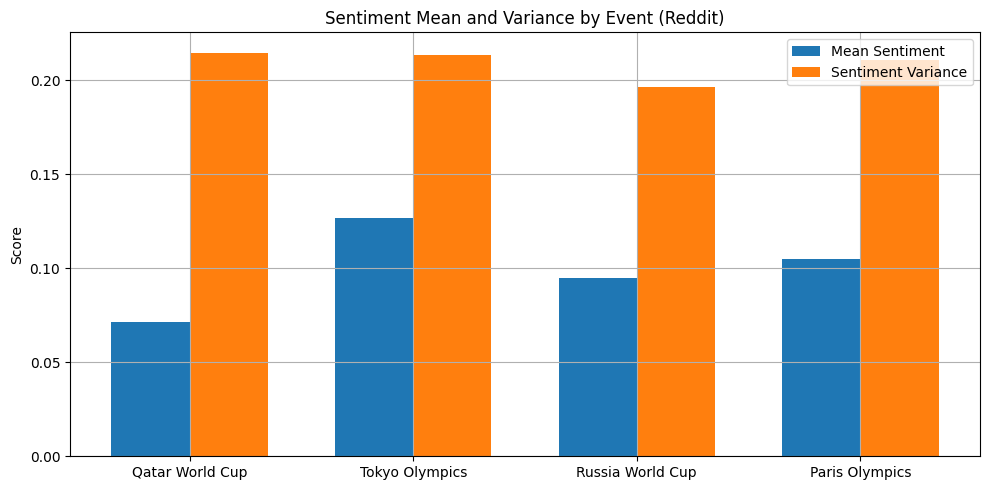

In [47]:
events = ["Qatar World Cup", "Tokyo Olympics", "Russia World Cup", "Paris Olympics"]
sentiment_mean = [0.071323, 0.126670, 0.094994, 0.104634]
sentiment_variance = [0.214659, 0.213091, 0.196359, 0.210734]
x = np.arange(len(events))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, sentiment_mean, width, label='Mean Sentiment')
bars2 = ax.bar(x + width/2, sentiment_variance, width, label='Sentiment Variance')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Sentiment Mean and Variance by Event (Reddit)')
ax.set_xticks(x)
ax.set_xticklabels(events)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
import networkx as nx
from collections import Counter

# Reload the olympics combined graph
graph = nx.read_graphml("graphs/olympics_combined_louvain.graphml")

# Load Youtube Olympic comments
df_tokyo_youtube = pd.read_csv("datasets/youtube/tokyo_olympics.csv")
df_paris_youtube = pd.read_csv("datasets/youtube/paris_olympics.csv")
df_youtube_olympics = pd.concat([df_tokyo_youtube, df_paris_youtube], ignore_index=True)
df_youtube_olympics['author'] = df_youtube_olympics['author'].astype(str)

# Identify community 109 nodes
communities = nx.get_node_attributes(graph, 'community')
community_109_nodes = [node for node, comm in communities.items() if comm == 109]

# Filter to authors from Community 109
df_109_youtube = df_youtube_olympics[df_youtube_olympics['author'].isin(community_109_nodes)].copy()

# Check for matches
if not df_109_youtube.empty:
    combined_text = " ".join(df_109_youtube['text'].dropna().astype(str).values)
    sample_comments = df_109_youtube['text'].dropna().sample(10, random_state=42).tolist()
else:
    combined_text = ""
    sample_comments = []

len(df_109_youtube), sample_comments

(17782,
 ['Digrass❤',
  'どの人種、言語の人が見ても分かりやすく、そしてなにより将来を担う子供がキラキラした顔で見られる物で無くてはいけないよね。\n東京オリンピックの優勝はこの映像。',
  'con tema de dragon ball de fondo xd',
  'he has a clear advantage of height (longer legs)',
  'great',
  'I love those two👍👍👍👍👍',
  'Great video!! It’s fair comparison. I think that 96 team is one of the top 2-3 us Olympic team💪',
  'the guy showing his wedding ring is soo adorable big W for him and his family 💞',
  'Beautiful! ❤❤❤',
  'One of the few best shorts on YT. Ive watched this hundreds of times ❤'])

In [59]:
import networkx as nx
from collections import Counter

# Reload the olympics combined graph
graph = nx.read_graphml("graphs/world_cup_combined_louvain.graphml")

# Load Youtube Olympic comments
df_tokyo_youtube = pd.read_csv("datasets/youtube/qatar_world_cup.csv")
df_paris_youtube = pd.read_csv("datasets/youtube/russia_world_cup.csv")
df_youtube_olympics = pd.concat([df_tokyo_youtube, df_paris_youtube], ignore_index=True)
df_youtube_olympics['author'] = df_youtube_olympics['author'].astype(str)

# Identify community 93 nodes
communities = nx.get_node_attributes(graph, 'community')
community_93_nodes = [node for node, comm in communities.items() if comm == 93]

# Filter to authors from Community 93
df_93_youtube = df_youtube_olympics[df_youtube_olympics['author'].isin(community_93_nodes)].copy()

# Check for matches
if not df_93_youtube.empty:
    combined_text = " ".join(df_93_youtube['text'].dropna().astype(str).values)
    sample_comments = df_93_youtube['text'].dropna().sample(10, random_state=42).tolist()
else:
    combined_text = ""
    sample_comments = []

len(df_93_youtube), sample_comments

(21185,
 ['Anyone in december 2024?',
  'Ronaldo 😢❤❤',
  '대한민국 ** ***',
  'Peter dhuri best commentator of the game 🔥🔥🔥',
  '2025',
  'Hola buenas tardes vecino como ago la casa y me avisa para ver qué le dije al colegio de mi mamá de la vecina que le dije que tengan un favor para mañana y mañana para que me envíen el murete de luz y no hay techo para que se cortó el cabello para el lunes en el varrio de la vecina de la vecina de la vecina de la vecina de la vecina gordita de luz que se 😅😅 y se fue y me sale que se me dijo que no me gusta que se prestó a la soni y a don Efraín y me dijo que si no se puede ir ala secretaria de luz y vecina y yo',
  'MoSalah 🔥🔥🔥',
  'This is the worst of all  world cup finals played  in 21st century',
  "imagine being so rigged even the organizer accepted that it's rigged",
  '4 years later, Japan come back much strong'])